In [1]:
# mount my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import relevant modules
import os
import cv2
import random
import zipfile
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt


# modules for deep learning model
from sklearn.utils import shuffle
from tensorflow.keras import backend
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU

# Data Exploration

Data will be imported from the dataset, and analyzed

In [3]:
# import the dataset of images

path = '/content/drive/MyDrive/Data Science Course/Capstone Project/cell_images.zip'

# data is provided as a zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
# locate the image file path
images_train_parasitized_path = f'/content/cell_images/train/parasitized'
images_train_uninfected_path = f'/content/cell_images/train/uninfected'
images_test_parasitized_path = f'/content/cell_images/test/parasitized'
images_test_uninfected_path = f'/content/cell_images/test/uninfected'

# create lists to store the images
train = []
test = []

# lists to store labels
train_labels = []
test_labels = []

# load the images into the lists

# train infected
for file in os.listdir(images_train_parasitized_path):
  image = cv2.imread(f'{images_train_parasitized_path}/{file}')
  image = cv2.resize(image, (64,64)) # resize the image
  train.append(image) # append to the list

  # create labels. 0 = uninfected, 1 = parasitized
  train_labels.append(1)

# test infected
for file in os.listdir(images_test_parasitized_path):
  image = cv2.imread(f'{images_test_parasitized_path}/{file}')
  image = cv2.resize(image, (64, 64)) # resize the image
  test.append(image) # append to the list

  # create labels. 0 = uninfected, 1 = parasitized
  test_labels.append(1)

# train uninfected
for file in os.listdir(images_train_uninfected_path):
  image = cv2.imread(f'{images_train_uninfected_path}/{file}')
  image = cv2.resize(image, (64,64)) # resize the image
  train.append(image) # append to the list

  # create labels. 0 = uninfected, 1 = parasitized
  train_labels.append(0)

# test uninfected
for file in os.listdir(images_test_uninfected_path):
  image = cv2.imread(f'{images_test_uninfected_path}/{file}')
  image = cv2.resize(image, (64,64)) # resize the image
  test.append(image) # append to the list

  # create labels. 0 = uninfected, 1 = parasitized
  test_labels.append(0)

# convert the lists to arrays for 4D input
training_images = np.array(train)
testing_images = np.array(test)

# convert labels into arrays
y_train = np.array(train_labels)
y_test = np.array(test_labels)

# shuffle the data
training_images, y_train = shuffle(training_images, y_train, random_state = 142)
testing_images, y_test = shuffle(testing_images, y_test, random_state = 142)


In [5]:
# verify the shape of data
print(f'Shape of train images: {np.array(training_images).shape}')
print(f'Shape of test images: {np.array(testing_images).shape}')
print('')

print(f'Shape of train labels: {np.array(y_train).shape}')
print(f'Shape of test labels: {np.array(y_test).shape}')

Shape of train images: (24958, 64, 64, 3)
Shape of test images: (2600, 64, 64, 3)

Shape of train labels: (24958,)
Shape of test labels: (2600,)


In [6]:
# count the number of infected vs uninfected data points

# count the number of values in train
counter_train_0 = 0
counter_train_1 = 0

for label in y_train:
  if label == 0:
    counter_train_0 += 1
  else:
    counter_train_1 += 1

# count the values in test
counter_test_0 = 0
counter_test_1 = 0
for label in y_test:
  if label == 0:
    counter_test_0 += 1
  else:
    counter_test_1 += 1

print(f'The number of uninfected images in the training data is {counter_train_0}')
print(f'The number of infected images in the training data is {counter_train_1}')
print('')
print(f'The number of uninfected images in the testing data is {counter_test_0}')
print(f'The number of infected images in the testing data is {counter_test_1}')

The number of uninfected images in the training data is 12376
The number of infected images in the training data is 12582

The number of uninfected images in the testing data is 1300
The number of infected images in the testing data is 1300


In [7]:
# normalize the images for analysis
# divide by 255, max pixel size
# ensures all pixel values fall within range [0,1]

X_train = training_images/255
X_test = testing_images/255

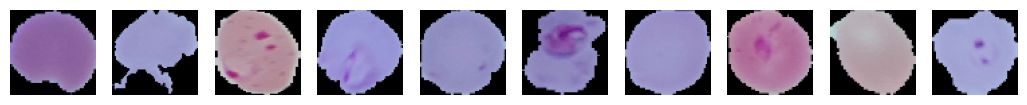


The labels are:
 [0, 0, 1, 1, 1, 1, 0, 1, 0, 1]


In [8]:
# visualize the images in dataset

# number of images to display
n = 10

# create a figure and axes
fig, axes = plt.subplots(1, n, figsize=(13, 2))

# display n images
for i in range(n):
    axes[i].imshow(X_train[i])
    axes[i].axis('off')  # Hide axes ticks and labels

# display the plot
plt.show()

print('')

# display the labels underneath
print(f'The labels are:\n {[y_train[i] for i in range(n)]}')

In [9]:
# convert the images from RGB to HSV (for testing purposes)

def convert_to_hsv(data):
  hsv_data = []
  for img in data:
    hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    hsv_data.append(hsv_img)
  return np.array(hsv_data)

# convert training images to hsv
X_train_hsv = convert_to_hsv(training_images)

# convert testing images to hsv
X_test_hsv = convert_to_hsv(testing_images)

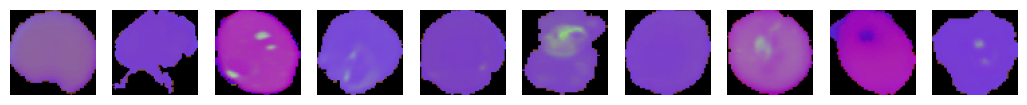


The labels are:
 [0, 0, 1, 1, 1, 1, 0, 1, 0, 1]


In [10]:
# visualize the hsv images

# number of images to display
n = 10

# create a figure and axes
fig, axes = plt.subplots(1, n, figsize=(13, 2))

# display n images
for i in range(n):
    axes[i].imshow(X_train_hsv[i])
    axes[i].axis('off')  # Hide axes ticks and labels

# display the plot
plt.show()

print('')

# display the labels underneath
print(f'The labels are:\n {[y_train[i] for i in range(n)]}')

# Model Building

Two models will be designed, each tested on the RGB data and then the HSV data to determine which performs best.

The first model developed will be a **simpler** model, with fewer layers and lack of normalization between layers. This is to check whether a base level model will perform well, and provide an understanding of how to further improve the model.

In [11]:
# one hot encoding of labels
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [ ]:
# print a sample for verification
print(y_train[0])
print(y_train_encoded[0])

0
[1. 0.]


In [ ]:
# fix a seed to ensure reproducibility
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# build model
def model_1_rgb():
    model = Sequential()

    # input layer
    model.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same', input_shape = (64, 64, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = 2))

    # second layer
    model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    # third layer
    model.add(Conv2D(filters = 64,kernel_size = (3, 3), padding ='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.3))

    # fourth layer
    model.add(Flatten())
    model.add(Dense(128))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.3))

    # output layer
    model.add(Dense(2, activation='softmax'))

    return model

In [ ]:
# compile the model
model_1_rgb = model_1_rgb()
print(model_1_rgb.summary())

model_1_rgb.compile(

    loss = 'binary_crossentropy',    # binary classification problem, so binary crossentropy loss function
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics=['accuracy']

)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 552,834 (2.11 MB)

 Trainable params: 552,834 (2.11 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# define the callbacks
# saves the best model and stops the program if the loss function doesn't improve
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=2, mode='min')

In [ ]:
# fit the model on the RGB images
history_1_rgb = model_1_rgb.fit(

            X_train, y_train_encoded,

            epochs = 20,                # number of times training occurs

            validation_split = 0.2,     # fraction of training data to use as validation

            batch_size = 32,           # number of samples to process before the model is updated

            callbacks = [checkpoint, early_stopping],

            verbose = 1
)


Epoch 1/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.7131 - loss: 0.4929 - val_accuracy: 0.9734 - val_loss: 0.0771
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9717 - loss: 0.0871 - val_accuracy: 0.9780 - val_loss: 0.0640
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9758 - loss: 0.0725 - val_accuracy: 0.9840 - val_loss: 0.0498
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9783 - loss: 0.0638 - val_accuracy: 0.9824 - val_loss: 0.0478
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9808 - loss: 0.0574 - val_accuracy: 0.9844 - val_loss: 0.0463
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9825 - loss: 0.0536 - val_accuracy: 0.9806 - val_loss: 0.0546
Epoch 7/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9834 - loss: 0.0481 - val_accuracy: 0.9820 - val_loss: 0.0491


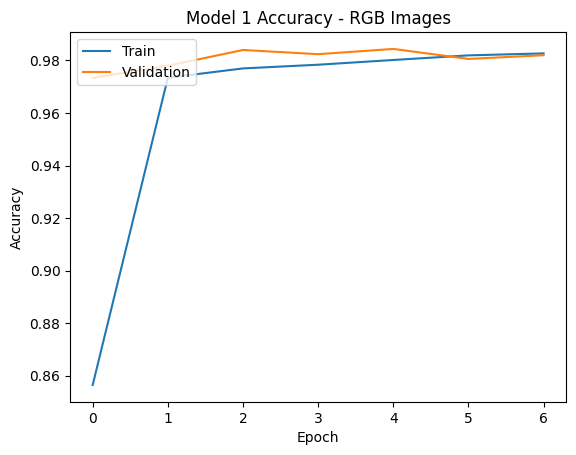

In [ ]:
# plot the training vs testing accuracies
plt.plot(history_1_rgb.history['accuracy'])
plt.plot(history_1_rgb.history['val_accuracy'])
plt.title('Model 1 Accuracy - RGB Images')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


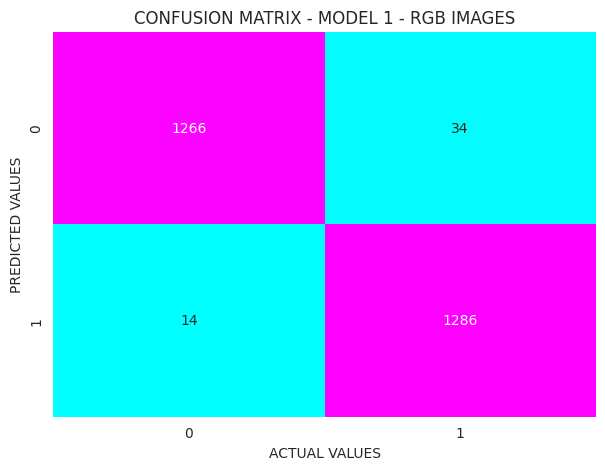


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



In [ ]:
# evaluate the model on test data
Y_pred = model_1_rgb.predict(X_test)
Y_pred = [np.argmax(i) for i in Y_pred]

# plot the confusion matrix

sns.set_style("dark")

# Set figure size
plt.figure(figsize = (7, 5))

# Plot the title
plt.title("CONFUSION MATRIX - MODEL 1 - RGB IMAGES")

# Confusion matrix
cm = confusion_matrix([int(x) for x in y_test], Y_pred)

# Plot the confusion matrix as heatmap
sns.heatmap(cm, annot = True, cmap = "cool", fmt = 'g', cbar = False)

# Set X-label and Y-label
plt.xlabel("ACTUAL VALUES")
plt.ylabel("PREDICTED VALUES")

# Show the plot
plt.show()

print('')

# Print the metrics
print(classification_report(y_test, Y_pred))

In [ ]:
# Clearing the backend
backend.clear_session()

# reset the seeds
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# build model for hsv images
def model_1_hsv():
    model = Sequential()

    # input layer
    model.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same', input_shape = (64, 64, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = 2))

    # second layer
    model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    # third layer
    model.add(Conv2D(filters = 64,kernel_size = (3, 3), padding ='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.3))

    # fourth layer
    model.add(Flatten())
    model.add(Dense(128))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.3))

    # output layer
    model.add(Dense(2, activation='softmax'))

    return model

# compile the model
model_1_hsv = model_1_hsv()
model_1_hsv.compile(

    loss = 'binary_crossentropy',    # binary classification problem, so binary crossentropy loss function
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics=['accuracy']

)

# define the callbacks
# saves the best model and stops the program if the loss function doesn't improve
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=2, mode='min')

# fit the model on the RGB images
history_1_hsv = model_1_hsv.fit(

            X_train_hsv, y_train_encoded,

            epochs = 20,                # number of times training occurs

            validation_split = 0.2,     # fraction of training data to use as validation

            batch_size = 32,           # number of samples to process before the model is updated

            callbacks = [checkpoint, early_stopping],

            verbose = 1
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.6303 - loss: 1.7552 - val_accuracy: 0.9756 - val_loss: 0.0744
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9665 - loss: 0.1118 - val_accuracy: 0.9804 - val_loss: 0.0611
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9724 - loss: 0.0926 - val_accuracy: 0.9822 - val_loss: 0.0541
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9767 - loss: 0.0831 - val_accuracy: 0.9842 - val_loss: 0.0505
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9764 - loss: 0.0778 - val_accuracy: 0.9826 - val_loss: 0.0520
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9788 - loss: 0.0711 - val_accuracy: 0.9826 - val_loss: 0.0514


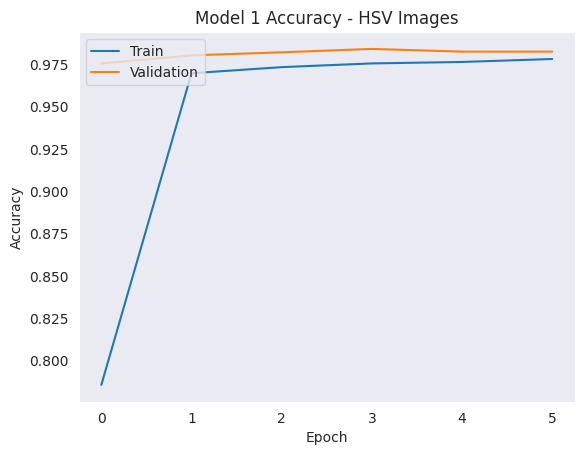

In [ ]:
# plot the training vs testing accuracies
plt.plot(history_1_hsv.history['accuracy'])
plt.plot(history_1_hsv.history['val_accuracy'])
plt.title('Model 1 Accuracy - HSV Images')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


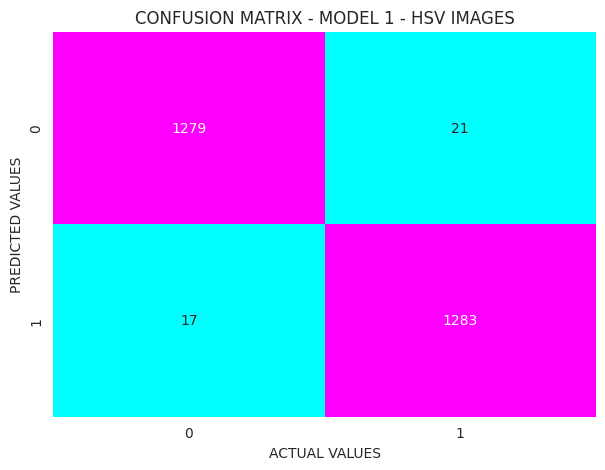


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1300
           1       0.98      0.99      0.99      1300

    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600



In [ ]:
# evaluate the model on test data
Y_pred = model_1_hsv.predict(X_test_hsv)
Y_pred = [np.argmax(i) for i in Y_pred]

# plot the confusion matrix

sns.set_style("dark")

# Set figure size
plt.figure(figsize = (7, 5))

# Plot the title
plt.title("CONFUSION MATRIX - MODEL 1 - HSV IMAGES")

# Confusion matrix
cm = confusion_matrix([int(x) for x in y_test], Y_pred)

# Plot the confusion matrix as heatmap
sns.heatmap(cm, annot = True, cmap = "cool", fmt = 'g', cbar = False)

# Set X-label and Y-label
plt.xlabel("ACTUAL VALUES")
plt.ylabel("PREDICTED VALUES")

# Show the plot
plt.show()

print('')

# Print the metrics
print(classification_report(y_test, Y_pred))

# **Write some observations and insights here**

Now, we begin building model 2. We will be adding more layers, include normalization and make use of the `leakyrelu` activation function to avoid teh activation function from 'dying' when `relu` is used

In [18]:
# Clearing the backend
backend.clear_session()

# reset the seeds
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [19]:
# build model
def model_2_rgb():

    # create a sequential model
    model = Sequential()

    # input layer
    model.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same', input_shape = (64, 64, 3)))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size = 2))

    # second layer
    model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # third layer
    model.add(Conv2D(filters = 64,kernel_size = (3, 3), padding ='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(BatchNormalization())

    # fourth layer
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.3))

    # fourth layer
    model.add(Flatten())
    model.add(Dense(128))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.3))

    # Output layer
    model.add(Dense(2, activation='softmax'))

    return model

In [20]:
# compile the model
model_2_rgb = model_2_rgb()
print(model_2_rgb.summary())
model_2_rgb.compile(

    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics=['accuracy']
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 112,930 (441.13 KB)

 Trainable params: 112,738 (440.38 KB)

 Non-trainable params: 192 (768.00 B)

None


In [21]:
# define the callbacks
# saves the best model and stops the program if the loss function doesn't improve
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=2, mode='min')

In [22]:
history_2_rgb = model_2_rgb.fit(

            X_train, y_train_encoded,

            epochs = 20,                # number of times training occurs

            validation_split = 0.2,     # fraction of training data to use as validation

            batch_size = 32,           # number of samples to process before the model is updated

            callbacks = [checkpoint, early_stopping],

            verbose = 1
)

Epoch 1/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.7457 - loss: 0.5062 - val_accuracy: 0.9545 - val_loss: 0.1390
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9736 - loss: 0.0931 - val_accuracy: 0.9764 - val_loss: 0.0815
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9777 - loss: 0.0781 - val_accuracy: 0.9772 - val_loss: 0.0843
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9763 - loss: 0.0778 - val_accuracy: 0.9792 - val_loss: 0.0671
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9787 - loss: 0.0738 - val_accuracy: 0.9766 - val_loss: 0.0889
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9791 - loss: 0.0694 - val_accuracy: 0.9772 - val_loss: 0.0837


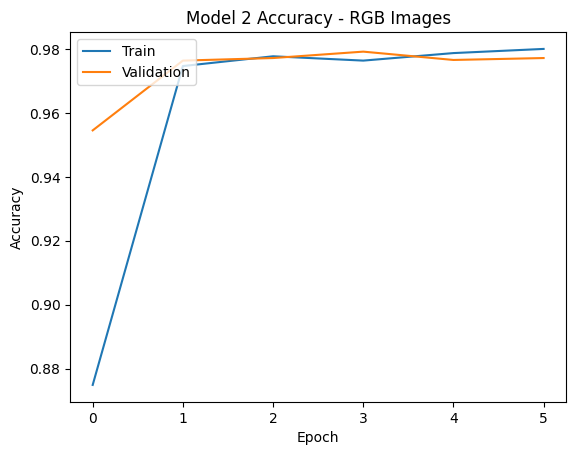

In [23]:
# plot the training vs testing accuracies
plt.plot(history_2_rgb.history['accuracy'])
plt.plot(history_2_rgb.history['val_accuracy'])
plt.title('Model 2 Accuracy - RGB Images')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

In [24]:
# evaluate the model
Y_pred = model_2_rgb.predict(X_test)
Y_pred = [np.argmax(i) for i in Y_pred]

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


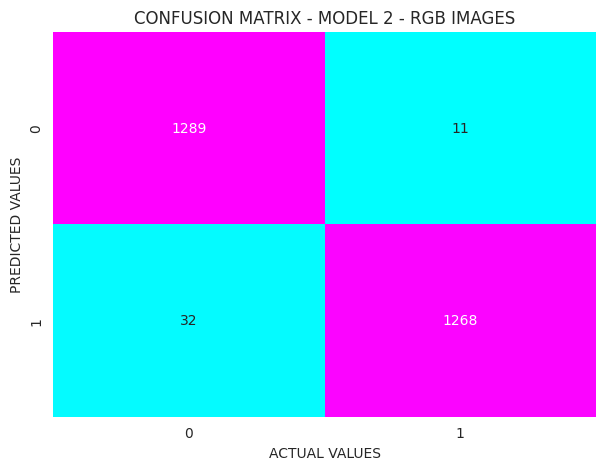


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1300
           1       0.99      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



In [25]:
# Set style as dark
sns.set_style("dark")

# Set figure size
plt.figure(figsize = (7, 5))

# Plot the title
plt.title("CONFUSION MATRIX - MODEL 2 - RGB IMAGES")

# Confusion matrix
cm = confusion_matrix([int(x) for x in y_test], Y_pred)

# Plot the confusion matrix as heatmap
sns.heatmap(cm, annot = True, cmap = "cool", fmt = 'g', cbar = False)

# Set X-label and Y-label
plt.xlabel("ACTUAL VALUES")
plt.ylabel("PREDICTED VALUES")

# Show the plot
plt.show()

print('')

# Print the metrics
print(classification_report(y_test, Y_pred))

In [12]:
# Clearing the backend
backend.clear_session()

# reset the seeds
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# build model for hsv images
def model_2_hsv():

    # create a sequential model
    model = Sequential()

    # input layer
    model.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same', input_shape = (64, 64, 3)))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size = 2))

    # second layer
    model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # third layer
    model.add(Conv2D(filters = 64,kernel_size = (3, 3), padding ='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(BatchNormalization())

    # fourth layer
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.3))

    # fourth layer
    model.add(Flatten())
    model.add(Dense(128))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.3))

    # Output layer
    model.add(Dense(2, activation='softmax'))

    return model

# compile the model
model_2_hsv = model_2_hsv()
model_2_hsv.compile(

    loss = 'binary_crossentropy',    # binary classification problem, so binary crossentropy loss function
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics=['accuracy']

)

# define the callbacks
# saves the best model and stops the program if the loss function doesn't improve
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=2, mode='min')

# fit the model on the RGB images
history_2_hsv = model_2_hsv.fit(

            X_train_hsv, y_train_encoded,

            epochs = 20,                # number of times training occurs

            validation_split = 0.2,     # fraction of training data to use as validation

            batch_size = 32,           # number of samples to process before the model is updated

            callbacks = [checkpoint, early_stopping],

            verbose = 1
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.8089 - loss: 0.4054 - val_accuracy: 0.9551 - val_loss: 0.1752
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9748 - loss: 0.0899 - val_accuracy: 0.9756 - val_loss: 0.0918
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9776 - loss: 0.0722 - val_accuracy: 0.9754 - val_loss: 0.0866
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9786 - loss: 0.0695 - val_accuracy: 0.9788 - val_loss: 0.0744
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9804 - loss: 0.0613 - val_accuracy: 0.9766 - val_loss: 0.0994
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9790 - loss: 0.0642 - val_accuracy: 0.9782 - val_loss: 0.0710
Epoch 7/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9811 - loss: 0.0569 - val_accuracy: 0.9750 - val_loss: 0.0837
Epoch 8/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9818 - loss: 0.0563 - val_accuracy: 

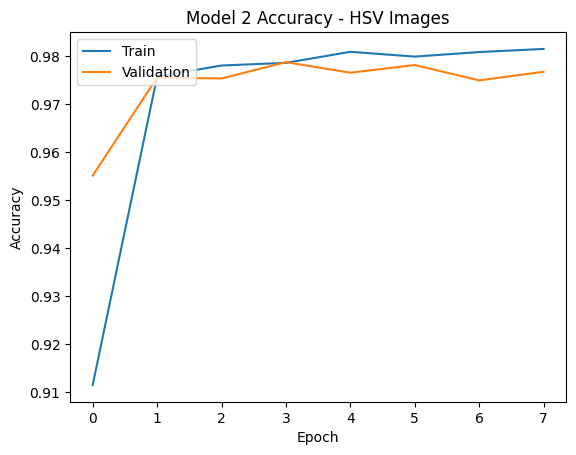

In [13]:
# plot the training vs testing accuracies
plt.plot(history_2_hsv.history['accuracy'])
plt.plot(history_2_hsv.history['val_accuracy'])
plt.title('Model 2 Accuracy - HSV Images')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


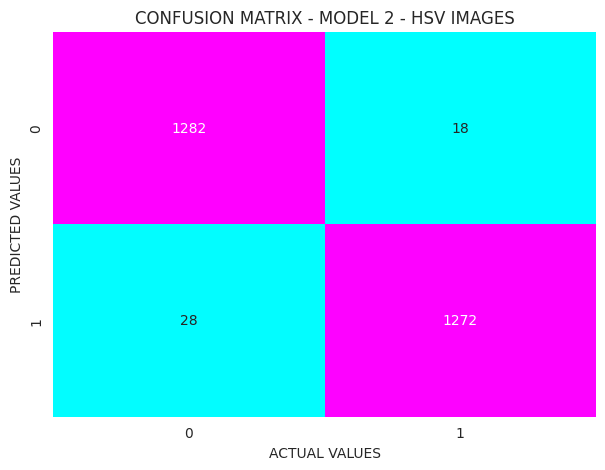


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1300
           1       0.99      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



In [14]:
# evaluate the model on test data
Y_pred = model_2_hsv.predict(X_test_hsv)
Y_pred = [np.argmax(i) for i in Y_pred]

# plot the confusion matrix

sns.set_style("dark")

# Set figure size
plt.figure(figsize = (7, 5))

# Plot the title
plt.title("CONFUSION MATRIX - MODEL 2 - HSV IMAGES")

# Confusion matrix
cm = confusion_matrix([int(x) for x in y_test], Y_pred)

# Plot the confusion matrix as heatmap
sns.heatmap(cm, annot = True, cmap = "cool", fmt = 'g', cbar = False)

# Set X-label and Y-label
plt.xlabel("ACTUAL VALUES")
plt.ylabel("PREDICTED VALUES")

# Show the plot
plt.show()

print('')

# Print the metrics
print(classification_report(y_test, Y_pred))